# Design Questions

### [Design LRU cache](https://leetcode.com/problems/lru-cache/)

In [ ]:
'''
Fast look ups and fast removals. 
Idea: Hashmap and doubly linked list.

TC: O(1)
SC: O(capacity)
'''
# doubly linkedlist
class Node:
    def __init__(self,key,value):
        self.key = key
        self.value = value
        self.prev = None
        self.next = None

class LRUCache:

    def __init__(self, capacity: int):
        self.capacity = capacity
        self.map = dict()
        # head and tail
        self.head = Node(0,0)
        self.tail = Node(0,0)
        self.head.next = self.tail
        self.tail.prev = self.head

    def get(self, key: int) -> int:
        if key not in self.map:
            return -1
        n = self.map[key]
        # Move the node first of the list 
        self.remove(n)
        self.add_front(n)
        return n.value

    def put(self, key: int, value: int) -> None:
        if key in self.map:
            self.remove(self.map[key])
        # update the value for the key
        n = Node(key,value)
        self.add_front(n)
        self.map[key] = n
        if len(self.map) > self.capacity:
            n = self.tail.prev
            self.remove(n)
            del self.map[n.key]
            
    def remove(self, node):
        # standard doubly ll removal
        p = node.prev
        n = node.next
        p.next = n
        n.prev = p
        
    def add_front(self,node):
        
        # 1. node's prev should point to head
        node.prev = self.head
        # 2. new node should point to prev start node
        node.next = self.head.next 
        # 3. head.next.prev should point to node
        self.head.next.prev = node
        # 4. head's next should point to node
        self.head.next = node
        


# Your LRUCache object will be instantiated and called as such:
# obj = LRUCache(capacity)
# param_1 = obj.get(key)
# obj.put(key,value)

### [Min stack](https://leetcode.com/problems/min-stack/)

In [ ]:
class MinStack:

    def __init__(self):
        """
        initialize your data structure here.
        """
        self.stack = []

    def push(self, x: int) -> None:
        self.stack.append(x)

    def pop(self) -> None:
        self.stack.pop()

    def top(self) -> int:
        top = self.stack[-1]
        return top
    
    def getMin(self) -> int:
        return min(self.stack) if self.stack else 0

# Your MinStack object will be instantiated and called as such:
# obj = MinStack()
# obj.push(x)
# obj.pop()
# param_3 = obj.top()
# param_4 = obj.getMin()

### [Max stack](https://leetcode.com/problems/max-stack/)

In [ ]:
class MaxStack:

    def __init__(self):
        """
        initialize your data structure here.
        """
        self.stack = []

    def push(self, x: int) -> None:
        self.stack.insert(0,x)

    def pop(self) -> int:
        last = self.stack.pop(0)
        return last
    
    def top(self) -> int:
        return self.stack[0]

    def peekMax(self) -> int:
        return max(self.stack) if self.stack else 0    

    def popMax(self) -> int:
        max_val = max(self.stack) if self.stack else 0
        self.stack.remove(max_val)
        return max_val
        


# Your MaxStack object will be instantiated and called as such:
# obj = MaxStack()
# obj.push(x)
# param_2 = obj.pop()
# param_3 = obj.top()
# param_4 = obj.peekMax()
# param_5 = obj.popMax()

### [Design a Stack With Increment Operation](https://leetcode.com/problems/design-a-stack-with-increment-operation/)

In [ ]:
class CustomStack:

    def __init__(self, maxSize: int):
        self.maxSize = maxSize
        self.stack = []

    def push(self, x: int) -> None:
        
        if len(self.stack) < self.maxSize:
            self.stack.append(x)
            
        
    def pop(self) -> int:
        if self.stack:
            return self.stack.pop()
        else:
            return - 1
    
    def increment(self, k: int, val: int) -> None:
        
        if k < len(self.stack):
            size = k
        else:
            size = len(self.stack)
        for i in range(size):
            self.stack[i] += val
        


# Your CustomStack object will be instantiated and called as such:
# obj = CustomStack(maxSize)
# obj.push(x)
# param_2 = obj.pop()
# obj.increment(k,val)

### [Design HashSet]()

In [ ]:

class MyHashSet(object):

    def __init__(self):
        """
        Initialize your data structure here.
        """
        self.keyRange = 769
        self.bucketArray = [Bucket() for i in range(self.keyRange)]

    def _hash(self, key):
        return key % self.keyRange

    def add(self, key):
        """
        :type key: int
        :rtype: None
        """
        bucketIndex = self._hash(key)
        self.bucketArray[bucketIndex].insert(key)

    def remove(self, key):
        """
        :type key: int
        :rtype: None
        """
        bucketIndex = self._hash(key)
        self.bucketArray[bucketIndex].delete(key)

    def contains(self, key):
        """
        Returns true if this set contains the specified element
        :type key: int
        :rtype: bool
        """
        bucketIndex = self._hash(key)
        return self.bucketArray[bucketIndex].exists(key)


class Node:
    def __init__(self, value, nextNode=None):
        self.value = value
        self.next = nextNode

class Bucket:
    def __init__(self):
        # a pseudo head
        self.head = Node(0)

    def insert(self, newValue):
        # if not existed, add the new element to the head.
        if not self.exists(newValue):
            newNode = Node(newValue, self.head.next)
            # set the new head.
            self.head.next = newNode

    def delete(self, value):
        prev = self.head
        curr = self.head.next
        while curr is not None:
            if curr.value == value:
                # remove the current node
                prev.next = curr.next
                return
            prev = curr
            curr = curr.next

    def exists(self, value):
        curr = self.head.next
        while curr is not None:
            if curr.value == value:
                # value existed already, do nothing
                return True
            curr = curr.next
        return False


# Your MyHashSet object will be instantiated and called as such:
# obj = MyHashSet()
# obj.add(key)
# obj.remove(key)
# param_3 = obj.contains(key)

In [ ]:
class MyHashSet:

    def __init__(self):
        """
        Initialize your data structure here.
        """
        self.keyRange = 769
        self.bucketArray = [Bucket() for i in range(self.keyRange)]

    def _hash(self, key) -> int:
        return key % self.keyRange

    def add(self, key: int) -> None:
        bucketIndex = self._hash(key)
        self.bucketArray[bucketIndex].insert(key)

    def remove(self, key: int) -> None:
        """
        :type key: int
        :rtype: None
        """
        bucketIndex = self._hash(key)
        self.bucketArray[bucketIndex].delete(key)

    def contains(self, key: int) -> bool:
        """
        Returns true if this set contains the specified element
        :type key: int
        :rtype: bool
        """
        bucketIndex = self._hash(key)
        return self.bucketArray[bucketIndex].exists(key)

class Bucket:
    def __init__(self):
        self.tree = BSTree()

    def insert(self, value):
        self.tree.root = self.tree.insertIntoBST(self.tree.root, value)

    def delete(self, value):
        self.tree.root = self.tree.deleteNode(self.tree.root, value)

    def exists(self, value):
        return (self.tree.searchBST(self.tree.root, value) is not None)

class TreeNode:
    def __init__(self, value):
        self.val = value
        self.left = None
        self.right = None

class BSTree:
    def __init__(self):
        self.root = None

    def searchBST(self, root: TreeNode, val: int) -> TreeNode:
        if root is None or val == root.val:
            return root

        return self.searchBST(root.left, val) if val < root.val \
            else self.searchBST(root.right, val)

    def insertIntoBST(self, root: TreeNode, val: int) -> TreeNode:
        if not root:
            return TreeNode(val)

        if val > root.val:
            # insert into the right subtree
            root.right = self.insertIntoBST(root.right, val)
        elif val == root.val:
            return root
        else:
            # insert into the left subtree
            root.left = self.insertIntoBST(root.left, val)
        return root

    def successor(self, root):
        """
        One step right and then always left
        """
        root = root.right
        while root.left:
            root = root.left
        return root.val

    def predecessor(self, root):
        """
        One step left and then always right
        """
        root = root.left
        while root.right:
            root = root.right
        return root.val

    def deleteNode(self, root: TreeNode, key: int) -> TreeNode:
        if not root:
            return None

        # delete from the right subtree
        if key > root.val:
            root.right = self.deleteNode(root.right, key)
        # delete from the left subtree
        elif key < root.val:
            root.left = self.deleteNode(root.left, key)
        # delete the current node
        else:
            # the node is a leaf
            if not (root.left or root.right):
                root = None
            # the node is not a leaf and has a right child
            elif root.right:
                root.val = self.successor(root)
                root.right = self.deleteNode(root.right, root.val)
            # the node is not a leaf, has no right child, and has a left child
            else:
                root.val = self.predecessor(root)
                root.left = self.deleteNode(root.left, root.val)

        return root

# Your MyHashSet object will be instantiated and called as such:
# obj = MyHashSet()
# obj.add(key)
# obj.remove(key)
# param_3 = obj.contains(key)

### Design HashMap

In [ ]:
'''
Approach: Linked list with buckets.
Using linked list gives us the opportunity to add new key,val pair to the linked list. 
Handles collision
'''
class ListNode:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None
        
        
class MyHashMap:

    def __init__(self):
        self.size = 1000
        self.hash_table = [None] * self.size 

    def put(self, key: int, value: int) -> None:
        # hash function 
        index = key % self.size 
        
        # if no value at that index, create a entry. 
        
        if self.hash_table[index] == None:
            # We do not have anything in this bin, just create a new node 
            self.hash_table[index] = ListNode(key, value)
        
        else:
            # We do have something in this bin, traverse it checking to see if we have a matching key. If not just append a node to the end of the bin
            curr_node = self.hash_table[index]
            while True:
                # if we are trying to add the same key,val 
                if curr_node.key == key:
                    curr_node.value = value
                    return 
                
                if curr_node.next == None: 
                    break
                
                curr_node = curr_node.next 
            # Did not find a matching key here, so append a key, value pair in this bin
            curr_node.next = ListNode(key, value)

    def get(self, key: int) -> int:
        index = key % self.size 
        
        curr_node = self.hash_table[index]
        
        while curr_node:
            if curr_node.key == key:
                return curr_node.value 
            else:
                curr_node = curr_node.next
        
        return -1
        

    def remove(self, key: int) -> None:
        index = key % self.size 
        
        curr_node = prev_node = self.hash_table[index]
        
         # Removing from empty bin just return
        if not curr_node: return 
        
        if curr_node.key == key:
            # We found the node to delete immediately, we can now skip over it 
            self.hash_table[index] = curr_node.next
        else:
            # We did not find the node to delete we must now traverse the bin
            curr_node = curr_node.next
            
            while curr_node:
                if curr_node.key == key:
                    prev_node.next = curr_node.next 
                    break
                else:
                    prev_node, curr_node = prev_node.next, curr_node.next
        


# Your MyHashMap object will be instantiated and called as such:
# obj = MyHashMap()
# obj.put(key,value)
# param_2 = obj.get(key)
# obj.remove(key)

### Insert get random element

In [ ]:
from random import choice
class RandomizedSet():
    def __init__(self):
        """
        Initialize your data structure here.
        """
        self.dict = {}
        self.list = []

        
    def insert(self, val: int) -> bool:
        """
        Inserts a value to the set. Returns true if the set did not already contain the specified element.
        """
        if val in self.dict:
            return False
        # stores the index 
        self.dict[val] = len(self.list)
        self.list.append(val)
        return True
        

    def remove(self, val: int) -> bool:
        """
        Removes a value from the set. Returns true if the set contained the specified element.
        """
        if val in self.dict:
            # move the last element to the place idx of the element to delete
            last_element, idx = self.list[-1], self.dict[val]
            self.list[idx], self.dict[last_element] = last_element, idx
            # delete the last element
            self.list.pop()
            del self.dict[val]
            return True
        return False

    def getRandom(self) -> int:
        """
        Get a random element from the set.
        """
        return choice(self.list)

### [Design circular queue](https://leetcode.com/problems/design-circular-deque/)

ValueError: 'explode' must be of length 'x'

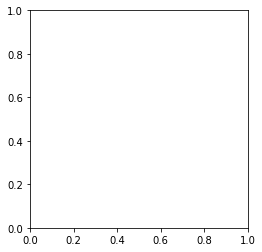

In [6]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs'
sizes = [15, 80]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()